## Wave spectra

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

# Filter the plot warning
warnings.filterwarnings( "ignore" )

### Jonswap Spectrum

The Jonswap spectrum can be expressed,

$$
S(\omega) = \frac{\alpha g^2}{\omega^5} \exp{\left[ -\beta \left( \frac{\omega_p}{\omega} \right) \right]} \gamma^r
$$

$$
r = \exp{\left[ -\frac{(\omega - \omega_p)^2}{ 2 \sigma^2 \omega_p^2 } \right]}
$$

where $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; $\alpha$ is the intensity of the spectrum, default value = 0.0081; $\beta$ is the shape factor, default value = 1.25; $\gamma$ is the peak enhancement factor, default value = 3.3; $g$ is the acceleration due to gravity, default value = 9.81.

Usually, the input paramters can be determined by the following equation from the JONSWAP experiment,

$$
\omega_p = 22 \left( \frac{g^2}{U_w F} \right) ^ {1/3}
$$

where $U_w$ is the wind speed at 10m above the sea surface; $F$ is the distance from a lee shore.

$$
\alpha = 0.076 \left( \frac{ U_w^2}{g F} \right)^{0.22}
$$

where $\omega_p$ is the peak frequency; $U_w$ is the wind speed at 10m above the sea surface.

$$
\beta = \frac{5}{4}
$$

$$
\gamma = 3.3
$$

Function `jonswapSpectrum` implements the Jonswap sepctrum.

Reference: 
* Hasselmann, K., Barnett, T.P., Bouws, E., Carlson, H., Cartwright, D.E., Enke, K., Ewing, J.A., Gienapp, A., Hasselmann, D.E., Kruseman, P. and Meerburg, A., 1973. Measurements of wind-wave growth and swell decay during the Joint North Sea Wave Project (JONSWAP). Ergaenzungsheft zur Deutschen Hydrographischen Zeitschrift, Reihe A.

#### Function help

In [2]:
from ffpack.lsm import jonswapSpectrum
help( jonswapSpectrum )

Help on function jonswapSpectrum in module ffpack.lsm.waveSpectra:

jonswapSpectrum(w, wp, alpha=0.0081, beta=1.25, gamma=3.3, g=9.81)
    JONSWAP (Joint North Sea Wave Project) spectrum is an empirical relationship 
    that defines the distribution of energy with frequency within the ocean.
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    alpha: scalar, optional
        Intensity of the Spectra.
    beta: scalar, optional
        Shape factor, fixed value 1.25.
    gamma: scalar, optional
        Peak enhancement factor.
    g: scalar, optional
        Acceleration due to gravity, a constant.
        9.81 m/s2 in SI units.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import jonswapSpectrum
    >>> 

#### Example with default values

In [3]:
jsfRange = np.linspace( 0.0, 1.2, num=121 )

In [4]:
wp = 0.51
jsfResults = [ jonswapSpectrum( w, wp ) for w in jsfRange ]

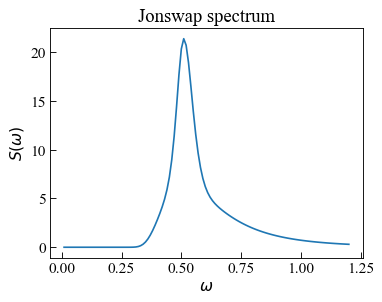

In [5]:
fig, ax = plt.subplots()

ax.plot( np.array( jsfRange ),
         np.array( jsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Jonswap spectrum" )

plt.tight_layout()
plt.show()

### Pierson Moskowitz Spectrum

The Pierson Moskowitz spectrum can be expressed,

$$
S(\omega) = \frac{\alpha g^2}{\omega^5} \exp{\left[ -\beta \left( \frac{\omega_0}{\omega} \right) \right]} \gamma^r
$$

where $\alpha$ is the intensity of the spectrum, default value = 0.0081; $\beta$ is the shape factor, default value = 0.74.

$$
\omega_0 = \frac{g}{U_w}
$$

where $g$ is the acceleration due to gravity, default value = 9.81; $U_w$ is the wind speed at 19.5m above the sea surface.

Reference: 

* Pierson Jr, W.J. and Moskowitz, L., 1964. A proposed spectral form for fully developed wind seas based on the similarity theory of SA Kitaigorodskii. Journal of geophysical research, 69(24), pp.5181-5190.

#### Function help

In [6]:
from ffpack.lsm import piersonMoskowitzSpectrum
help( piersonMoskowitzSpectrum )

Help on function piersonMoskowitzSpectrum in module ffpack.lsm.waveSpectra:

piersonMoskowitzSpectrum(w, Uw, alpha=0.0081, beta=0.74, g=9.81)
    Pierson Moskowitz spectrum is an empirical relationship 
    that defines the distribution of energy with frequency within the ocean.
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    Uw: scalar
        Wind speed at a height of 19.5m above the sea surface.
    alpha: scalar, optional
        Intensity of the Spectra.
    beta: scalar, optional
        Shape factor.
    g: scalar, optional
        Acceleration due to gravity, a constant.
        9.81 m/s2 in SI units.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import piersonMoskowitzSpectrum
    >>> w = 0.51
    >>> Uw = 20
    >>> rst = piersonMosk

#### Example with default values

In [7]:
pmsfRange = np.linspace( 0.0, 1.2, num=121 )

In [8]:
Uw = 20
pmsfResults = [ piersonMoskowitzSpectrum( w, Uw ) for w in pmsfRange ]

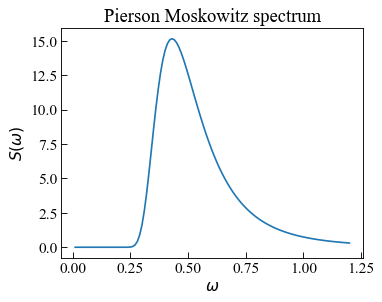

In [9]:
fig, ax = plt.subplots()

ax.plot( np.array( pmsfRange ),
         np.array( pmsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Pierson Moskowitz spectrum" )

plt.tight_layout()
plt.show()

### ISSC spectrum

The ISSC spectrum, also known as Bretschneider or modified Pierson-Moskowitz, can be expressed,

$$
S(\omega) = \frac{5}{16} \frac{Hs^{2} \omega_{p}^{4}}{\omega^5} \exp{\left[ -\frac{5}{4} \left( \frac{\omega_p}{\omega} \right)^{4} \right]}
$$

where $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; $Hs$ is the significant wave height.

Function `isscSpectrum` implements the ISSC sepctrum.

Reference: 

* Guidance Notes on Selecting Design Wave by Long Term Stochastic Method

#### Function help

In [10]:
from ffpack.lsm import isscSpectrum
help( isscSpectrum )

Help on function isscSpectrum in module ffpack.lsm.waveSpectra:

isscSpectrum(w, wp, Hs)
    ISSC spectrum, also known as Bretschneider or modified Pierson-Moskowitz. 
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    Hs: scalar
        Significant wave height.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
        If Hs is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import isscSpectrum
    >>> w = 0.02
    >>> wp = 0.51
    >>> Hs = 20
    >>> rst = isscSpectrum( w, wp, Hs )



#### Example with default values

In [11]:
isfRange = np.linspace( 0.0, 1.2, num=121 )

In [12]:
wp = 0.51
Hs = 20
isfResults = [ isscSpectrum( w, wp, Hs ) for w in isfRange ]

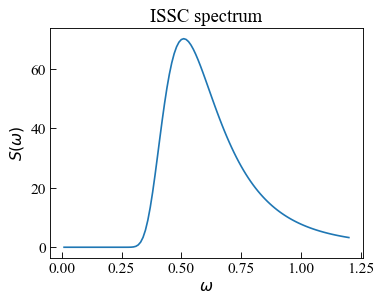

In [13]:
fig, ax = plt.subplots()

ax.plot( np.array( isfRange ),
         np.array( isfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "ISSC spectrum" )

plt.tight_layout()
plt.show()

### Gaussian Swell spectrum

The Gaussian Swell spectrum is typically used to model long period swell sea, and can be expressed,

$$
S(\omega) = \frac{(Hs/4)^{2}}{2\pi \delta \sqrt{2\pi}} \exp{\left[ -\frac{ (\omega - \omega_p) ^{2} }{ 2(2\pi \delta)^{2} } \right]}
$$

where $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; $Hs$ is the significant wave height; $\delta$ is the peakedness parameter for Gaussian spectral width.

Function `gaussianSwellSpectrum` implements the ISSC sepctrum.

Reference: 

* Guidance Notes on Selecting Design Wave by Long Term Stochastic Method

#### Function help

In [14]:
from ffpack.lsm import gaussianSwellSpectrum
help( gaussianSwellSpectrum )

Help on function gaussianSwellSpectrum in module ffpack.lsm.waveSpectra:

gaussianSwellSpectrum(w, wp, Hs, sigma)
    Gaussian Swell spectrum, typically used to model long period 
    swell seas [Guidance2016A]_. 
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    Hs: scalar
        Significant wave height.
    sigma: scalar
        peakedness parameter for Gaussian spectral width.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
        If Hs is not a scalar.
        If sigma is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import gaussianSwellSpectrum
    >>> w = 0.02
    >>> wp = 0.51
    >>> Hs = 20
    >>> sigma = 0.07
    >>> rst = gaussianSwellSpectrum( w, wp, Hs, sigma )
    
    References
    ----------
    .. [Guidance2016A] G

#### Example with default values

In [15]:
gsfRange = np.linspace( 0.0, 1.2, num=121 )

In [16]:
wp = 0.51
Hs = 20
sigma = 0.07
gsfResults = [ gaussianSwellSpectrum( w, wp, Hs, sigma ) for w in gsfRange ]

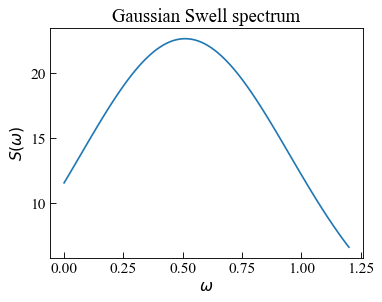

In [17]:
fig, ax = plt.subplots()

ax.plot( np.array( gsfRange ),
         np.array( gsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Gaussian Swell spectrum" )

plt.tight_layout()
plt.show()

### Ochi-Hubble spectrum

The Ochi-Hubble 6-Parameter spectrum covers shapes of wave spectra associated with the growth and decay of a storm, including swells, and can be expressed,

$$
S(\omega) = \frac{1}{4} \sum_{j=1}^{2} \frac{ \left(  -\frac{4\lambda_j+1}{4} \omega_{pj}^{4} \right)^{\lambda_j}}{\Gamma(\lambda_j)} \frac{H_{sj}^{2}}{\omega^{4\lambda_j + 1}} \exp{\left[ -\frac{4\lambda_j+1}{4} \left( \frac{\omega_p}{\omega} \right)^4 \right]}
$$

where $j = 1, 2$ stands for lower (swell part) and higher (wind seas part) frequency components; $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; the six parameters $H_{s1}, H_{s2}, \omega_{p1}, \omega_{p2}, \lambda_{1}, \lambda_{2}$ are determined numerically to minimize the
difference between theoretical and observed spectra.

The modal frequency of the first component, $\omega_{p1}$, must be less than that of the second, $\omega_{p2}$. The significant wave height of the first component, $H_{s1}$, should normally be greater than that of the second, $H_{s2}$, since most of the wave energy tends to be associated with the lower frequency component. 

Function `ochiHubbleSpectrum` implements the Jonswap sepctrum.

Reference: 

* Guidance Notes on Selecting Design Wave by Long Term Stochastic Method


#### Function help

In [18]:
from ffpack.lsm import ochiHubbleSpectrum
help( ochiHubbleSpectrum )

Help on function ochiHubbleSpectrum in module ffpack.lsm.waveSpectra:

ochiHubbleSpectrum(w, wp1, wp2, Hs1, Hs2, lambda1, lambda2)
    Ochi-Hubble spectrum covers shapes of wave spectra associated with the growth 
    and decay of a storm, including swells. [Guidance2016B]_. 
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp1, wp2: scalar
        Peak wave frequency.
    Hs1, Hs2: scalar
        Significant wave height.
    lambda1, lambda2: scalar
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp1 or wp2 is not a scalar.
        If Hs1 or Hs2 is not a scalar.
        If lambda1 or lambda2 is not a scalar.
        If wp1 is not smaller than wp2.
    
    Notes
    -----
    Hs1 should normally be greater than Hs2 since most of the wave energy tends to 
    be associated with the lower frequency component.
    
    Ex

#### Example with default values

In [19]:
ohfRange = np.linspace( 0.0, 1.2, num=121 )

In [20]:
wp1 = 0.4
wp2 = 0.51
Hs1 = 20
Hs2 = 15
lambda1 = 7
lambda2 = 10
ohfResults = [ ochiHubbleSpectrum( w, wp1, wp2, Hs1, Hs2, lambda1, lambda2 ) 
               for w in ohfRange ]

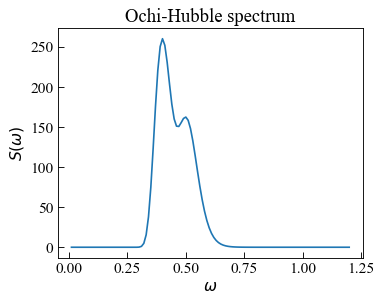

In [21]:
fig, ax = plt.subplots()

ax.plot( np.array( ohfRange ),
         np.array( ohfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Ochi-Hubble spectrum" )

plt.tight_layout()
plt.show()

### Wave spectra comparison

Note: 

- the shapes of the spectra are sensitive to the parameters
- some parameters are fixed in some spectra, and therefore the parameters should be close to the same case
- the curves below are adjusted to be similar by trying the parameters

In [22]:
waRange = np.linspace( 0.0, 1.2, num=121 )

In [23]:
wp = 0.51
jsfResults = [ jonswapSpectrum( w, wp, alpha=0.0081, beta=1.25, gamma=3.3, g=9.81 ) 
               for w in waRange ]

In [24]:
Uw = 25
pmsfResults = [ piersonMoskowitzSpectrum( w, Uw, alpha=0.0081, beta=1.25, g=9.81 ) 
                for w in waRange ]

In [25]:
wp = 0.51
Hs = 12
isfResults = [ isscSpectrum( w, wp, Hs ) for w in waRange ]

In [26]:
wp = 0.51
Hs = 12
sigma = 0.025
gsfResults = [ gaussianSwellSpectrum( w, wp, Hs, sigma ) for w in waRange ]

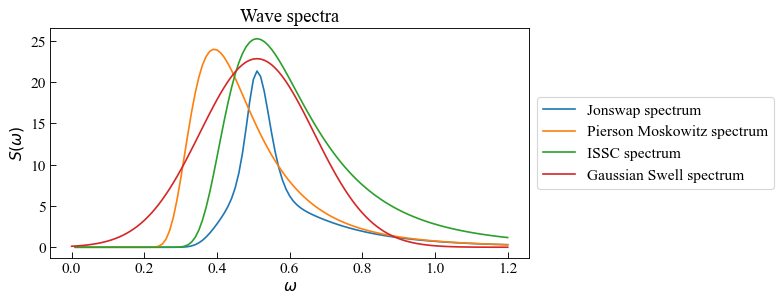

In [27]:
fig, ax = plt.subplots( figsize=(10, 4) )

ax.plot( np.array( jsfRange ),
         np.array( jsfResults ),
         label="Jonswap spectrum" )
ax.plot( np.array( pmsfRange ),
         np.array( pmsfResults ),
         label="Pierson Moskowitz spectrum" )
ax.plot( np.array( isfRange ),
         np.array( isfResults ),
         label="ISSC spectrum" )
ax.plot( np.array( gsfRange ),
         np.array( gsfResults ),
         label="Gaussian Swell spectrum" )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Wave spectra" )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()